In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# 1. Load Dataset [ A monthly Data of One Year]

In [2]:
January = pd.read_csv("Sales_January_2019.csv")
February = pd.read_csv("Sales_February_2019.csv")
March = pd.read_csv("Sales_March_2019.csv")
April = pd.read_csv("Sales_April_2019.csv")
May = pd.read_csv("Sales_May_2019.csv")
June = pd.read_csv("Sales_June_2019.csv")
July = pd.read_csv("Sales_July_2019.csv")
August = pd.read_csv("Sales_August_2019.csv")
September = pd.read_csv("Sales_September_2019.csv")
October = pd.read_csv("Sales_October_2019.csv")
November = pd.read_csv("Sales_November_2019.csv")
December = pd.read_csv("Sales_December_2019.csv")

# 2. Append the Data

In [7]:
e_com = pd.concat([January , February , March , April , May , June , 
                 July , August , September , October , November , December] , axis = 0 )

# 3. A Glance Of The Dataset

In [11]:
e_com.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


# 4. Data Preparation [cleaning and standardizarion]

### 4.1 NULL VALUE TREATMENT

In [15]:
# 1.1. Count of nulls:                                        
e_com.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [17]:
# 1.2. Find the nulls
e_com[e_com.isna().all(axis = 1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
22945,NaN,NaN,NaN,NaN,NaN,NaN
22962,NaN,NaN,NaN,NaN,NaN,NaN
23309,NaN,NaN,NaN,NaN,NaN,NaN
23996,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# 2. Remove the null values(Rows):                                                
ecom1 = e_com.dropna(how = 'all' , inplace = False)

In [21]:
# 3. After removing nulls:                           
ecom1.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### 4.2 DUPLICATES

In [28]:
# 1.1. Count of Duplicate(Row):                   
ecom1.duplicated().sum()

618

In [26]:
# 1.2. Find the duplicate rows
ecom1[ecom1.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
875,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
23337,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
23352,317971,AA Batteries (4-pack),1,3.84,12/17/19 18:39,"250 Chestnut St, San Francisco, CA 94016"
23748,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
24192,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [30]:
ecom1[(ecom1.duplicated()) & (ecom1["Order ID"] != "Order ID") ]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
875,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
4126,145143,Lightning Charging Cable,1,14.95,01/06/19 03:01,"182 Jefferson St, San Francisco, CA 94016"
5811,146765,Google Phone,1,600,01/21/19 11:23,"918 Highland St, New York City, NY 10001"
6807,147707,Wired Headphones,1,11.99,01/04/19 16:50,"883 4th St, Dallas, TX 75001"
8134,148984,USB-C Charging Cable,1,11.95,01/08/19 17:36,"562 14th St, Boston, MA 02215"
...,...,...,...,...,...,...
19894,314675,AA Batteries (4-pack),1,3.84,12/26/19 09:01,"927 13th St, San Francisco, CA 94016"
20452,315204,Wired Headphones,1,11.99,12/12/19 12:41,"680 6th St, San Francisco, CA 94016"
21240,315955,ThinkPad Laptop,1,999.99,12/26/19 17:28,"588 Chestnut St, Seattle, WA 98101"
21467,316173,AAA Batteries (4-pack),1,2.99,12/22/19 22:44,"907 Sunset St, Portland, OR 97035"


In [32]:
ecom1[ecom1['Order ID'] == "142071"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
874,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
875,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"


In [36]:
# 2. Drop  the duplicate rows:         
ecom2 = ecom1.drop_duplicates()

In [38]:
# 3. check Duplicates after modification                             
ecom2.duplicated().sum()

0

In [40]:
ecom2.shape

(185687, 6)

In [42]:
# total number of row reduction is (545+618)
186850-185687

1163

In [44]:
ecom2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


### 4.3 Standardisation the data

In [47]:
# 1. show all the columns datatypes:                    
ecom2.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [49]:
ecom2["Quantity Ordered"].unique()                                                      

array(['1', '2', '3', '5', '4', '7', 'Quantity Ordered', '6', '9', '8'],
      dtype=object)

In [51]:
ecom2["Price Each"].unique()                                                               

array(['700', '14.95', '11.99', '149.99', '2.99', '389.99', '11.95',
       '99.99', '150', '1700', '300', '400', '3.84', '600', '109.99',
       '379.99', '999.99', '600.0', 'Price Each', '700.0', '150.0',
       '300.0', '1700.0', '400.0'], dtype=object)

In [53]:
ecom2[~ecom2["Order ID"].str.isnumeric()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [55]:
# 2. Drop  the column index 1073:
ecom3 = ecom2[ecom2["Order ID"].str.isnumeric()]

In [57]:
ecom3.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [59]:
ecom3.loc[1073]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,151528,AAA Batteries (4-pack),1,2.99,02/11/19 16:05,"813 8th St, Austin, TX 73301"
1073,163024,USB-C Charging Cable,1,11.95,03/29/19 14:52,"580 Lincoln St, Dallas, TX 75001"
1073,177578,USB-C Charging Cable,1,11.95,04/28/19 22:51,"752 Park St, Dallas, TX 75001"
1073,195106,Apple Airpods Headphones,1,150,05/31/19 20:54,"908 Chestnut St, San Francisco, CA 94016"
1073,210944,27in FHD Monitor,1,149.99,06/21/19 16:28,"773 Cedar St, Seattle, WA 98101"
1073,223940,Macbook Pro Laptop,1,1700,07/30/19 17:42,"504 14th St, Portland, OR 97035"
1073,237704,AAA Batteries (4-pack),1,2.99,08/14/19 20:38,"498 Washington St, Austin, TX 73301"
1073,249182,Google Phone,1,600,09/26/19 21:19,"350 10th St, Dallas, TX 75001"
1073,260375,ThinkPad Laptop,1,999.99,10/16/19 10:42,"195 14th St, San Francisco, CA 94016"
1073,279822,AA Batteries (4-pack),1,3.84,11/16/19 14:08,"619 Highland St, San Francisco, CA 94016"


In [61]:
# 2. Now reset  the index:                                                          
ecom3.reset_index(drop = True , inplace = True)

In [63]:
# 3. Change the datatypes of these column:                                                   
ecom3["Quantity Ordered"] = ecom3["Quantity Ordered"].astype(int)
ecom3["Price Each"] = ecom3["Price Each"].astype(float)


In [65]:
# 4. Correct  the datatype of the 'Order Date' column:                                       
ecom3["Order Date"] = pd.to_datetime(ecom3["Order Date"])


In [66]:
# 5. check the datatypes after modification:                                                         
ecom3.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

# 5. Add some features

In [70]:
# Add day and month 
ecom3['Day'] = ecom3["Order Date"].dt.day                                           
ecom3['Month'] = ecom3["Order Date"].dt.month

# add day and month name
ecom3['Day_name'] = ecom3["Order Date"].dt.day_name()
ecom3['Month_name'] = ecom3["Order Date"].dt.month_name()


In [72]:
# Extract the street name , city name , and pct code from 'Purchase Address' column:
ecom3[['Street' , 'City' , 'CPT_code' ]]= ecom3['Purchase Address'].str.split(',' , expand = True)              

In [74]:
# show the city column content:                                                                  
ecom3['City'].unique()

array([' Boston', ' Portland', ' San Francisco', ' Los Angeles',
       ' Austin', ' Atlanta', ' Seattle', ' New York City', ' Dallas'],
      dtype=object)

In [76]:
# Make Total Price column:
ecom3['Total Price'] = ecom3['Quantity Ordered'] * ecom3['Price Each']                               

In [80]:
ecom3['Total Price']                            

0         700.00
1          14.95
2          23.98
3         149.99
4          11.99
           ...  
185681     14.95
185682      7.68
185683    400.00
185684     11.99
185685     99.99
Name: Total Price, Length: 185686, dtype: float64

In [82]:
# Show the products with count and from this I want to make a Category Column:
ecom3['Product'].value_counts()

Product
USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

In [84]:
# make a category column:
Product = ['Charging Cable' , 'Batteries' , 'Headphones' , 
           'Monitor' , 'Phone' , 'Laptop' , 'TV' ,                         
           'Washing Machine' , 'Dryer']

# make a function to convert the the product to category
def product_category(Product_name):
    for p in Product:
        if p in Product_name:
          Product_name = p
    return Product_name       

ecom3['Category']= ecom3['Product']
ecom3['Category']= ecom3['Category'].apply(product_category)

In [86]:
ecom3['Category'].value_counts()                                         

Category
Headphones         47672
Charging Cable     43469
Batteries          41170
Monitor            23995
Phone              14427
Laptop              8847
TV                  4794
Washing Machine      666
Dryer                646
Name: count, dtype: int64

In [88]:
47672+ 43469+41170+ 23995 + 14427 + 8847 + 4794  + 666 + 646

185686

# 6. EDA

## 6.1. Metadata 

In [92]:
# 1. To show the number of rows and columns
ecom3.shape

(185686, 15)

In [94]:
# 2. To show the total number of data points
ecom3.size

2785290

In [96]:
# 3. To show the column names
ecom3.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Day', 'Month', 'Day_name', 'Month_name', 'Street',
       'City', 'CPT_code', 'Total Price', 'Category'],
      dtype='object')

In [98]:
# 4. To show the non-null counts and datatypes of the columns
ecom3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int32         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
 6   Day               185686 non-null  int32         
 7   Month             185686 non-null  int32         
 8   Day_name          185686 non-null  object        
 9   Month_name        185686 non-null  object        
 10  Street            185686 non-null  object        
 11  City              185686 non-null  object        
 12  CPT_code          185686 non-null  object        
 13  Total Price       185686 non-null  float64       
 14  Cate

In [100]:
# 5. To  show the datatypes of the columns
ecom3.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Day                          int32
Month                        int32
Day_name                    object
Month_name                  object
Street                      object
City                        object
CPT_code                    object
Total Price                float64
Category                    object
dtype: object

In [102]:
# ecom3.to_csv("C:/Users/Shantanu/Downloads/ecom1.csv" , index = False)
ecom3.to_excel("C:/Users/Shantanu/Downloads/ecom1.xlsx" , index = False)

In [104]:
# 6.Null values in the columns
ecom3.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Day                 0
Month               0
Day_name            0
Month_name          0
Street              0
City                0
CPT_code            0
Total Price         0
Category            0
dtype: int64

In [106]:
# 7.Number of duplicate rows
ecom3.duplicated().sum()

0

In [108]:
# 8. To show the index 
ecom3.index

RangeIndex(start=0, stop=185686, step=1)

In [55]:
# 9.Columns unique values count
ecom3.nunique()

Order ID            178437
Product                 19
Quantity Ordered         9
Price Each              17
Order Date          142395
Purchase Address    140787
Day                     31
Month                   12
Day_name                 7
Month_name              12
Street               46837
City                     9
CPT_code                10
Total Price             54
Category                 9
dtype: int64

In [110]:
# 10. Five point summary:
ecom3[['Quantity Ordered' , 'Price Each' , 'Total Price']].describe()

,Quantity Ordered,Price Each,Total Price
count,185686.000000,185686.000000,185686.000000
mean,1.124544,184.519255,185.611936
std,0.443069,332.843838,333.032118
min,1.000000,2.990000,2.990000
25%,1.000000,11.950000,11.950000
50%,1.000000,14.950000,14.950000
75%,1.000000,150.000000,150.000000
max,9.000000,1700.000000,3400.000000


## 6.2 Seperate the numerical and categorical features:

In [112]:
categorical_features = ecom3[ecom3.dtypes[ecom3.dtypes == 'object'].index]
mix = ecom3[ecom3.dtypes[ecom3.dtypes != 'object'].index]
numerical_features = mix[mix.dtypes[mix.dtypes != 'datetime64[ns]'].index]

In [114]:
categorical_features.dtypes

Order ID            object
Product             object
Purchase Address    object
Day_name            object
Month_name          object
Street              object
City                object
CPT_code            object
Category            object
dtype: object

In [116]:
numerical_features.dtypes

Quantity Ordered      int32
Price Each          float64
Day                   int32
Month                 int32
Total Price         float64
dtype: object

# 7. Graphical Analysis

## 7.1 Univariate analysis(numerical)

### 7.1.1 Histogram

<Axes: ylabel='Density'>

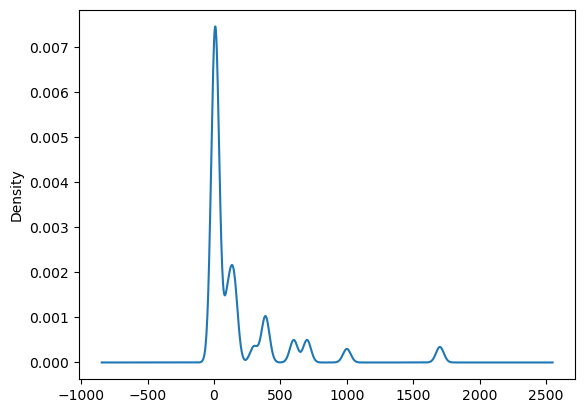

In [121]:
ecom3['Price Each'].plot.kde()

<Axes: ylabel='Density'>

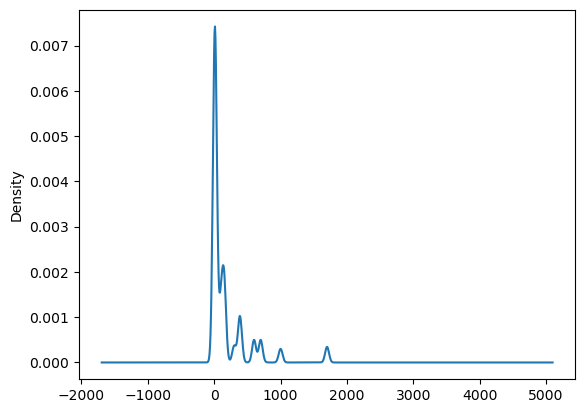

In [123]:
ecom3['Total Price'].plot.kde()

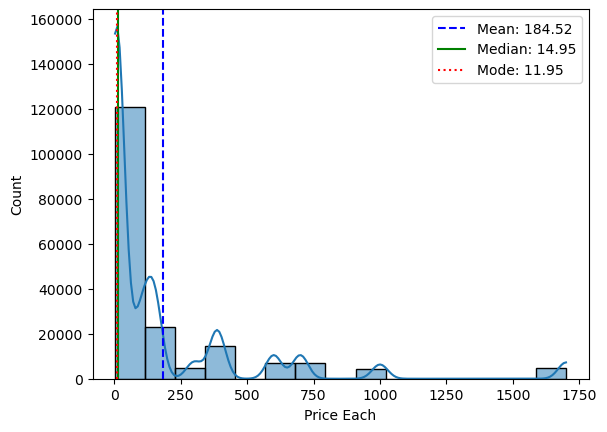

In [125]:
# Distribution of product Price with mean , median and mode.
sns.histplot(ecom3 , x = 'Price Each' , bins = 15 , kde=True)

# Calculate statistics
mean = ecom3['Price Each'].mean()
median = ecom3['Price Each'].median()
mode = ecom3['Price Each'].mode()[0]  # mode() returns a Series

# Add vertical lines
plt.axvline(mean, color='blue', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')
plt.axvline(mode, color='red', linestyle=':', label=f'Mode: {mode:.2f}')

# Add legend
plt.legend()

plt.show()

In [127]:
ecom3['Price Each'].value_counts()

Price Each
11.95      21859
14.95      21610
2.99       20612
3.84       20558
11.99      18849
150.00     15525
99.99      13298
149.99      7498
700.00      6840
600.00      6834
389.99      6225
379.99      6174
300.00      4794
1700.00     4721
999.99      4126
109.99      4098
400.00      2065
Name: count, dtype: int64

<Axes: xlabel='Total Price', ylabel='Count'>

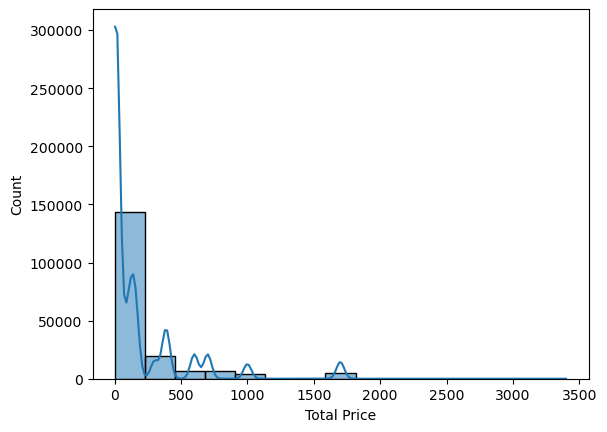

In [68]:
# Histogram of Order Price with KDE.
sns.histplot(ecom3 , x = 'Total Price' , bins = 15 , kde=True)


### 7.1.2 Boxplot (outlier detection)


<Axes: ylabel='Price Each'>

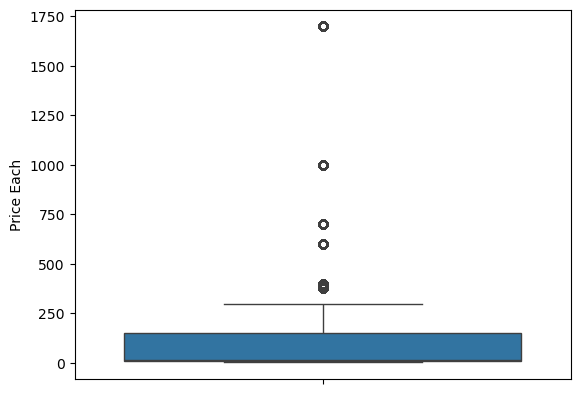

In [129]:
sns.boxplot(ecom3['Price Each'])

In [135]:
# Remove the Outliers.
Q1 = ecom3['Price Each'].quantile(0.25)
Q3 = ecom3['Price Each'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame
ecom4 = ecom3[(ecom3['Price Each'] >= lower_bound) & (ecom3['Price Each'] <= upper_bound)]




<Axes: ylabel='Total Price'>

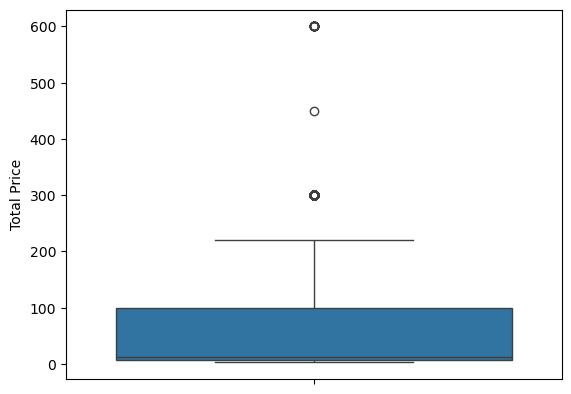

In [137]:
sns.boxplot(ecom4['Total Price'])

<Axes: xlabel='Total Price', ylabel='Count'>

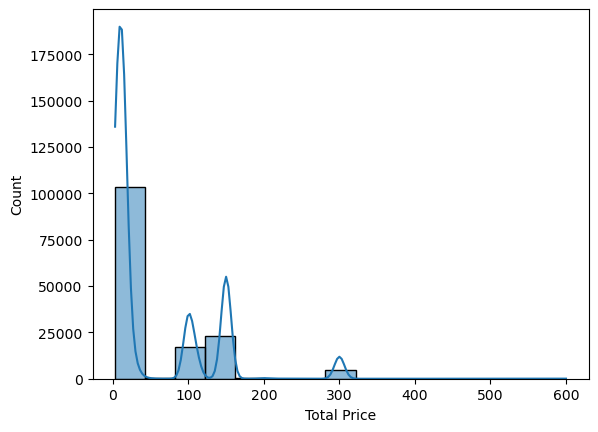

In [139]:
# Want to show the distribution after removing the outliers
sns.histplot(ecom4 , x = 'Total Price' , bins = 15 , kde=True)

### 7.1.3 Mean , Median , Mode

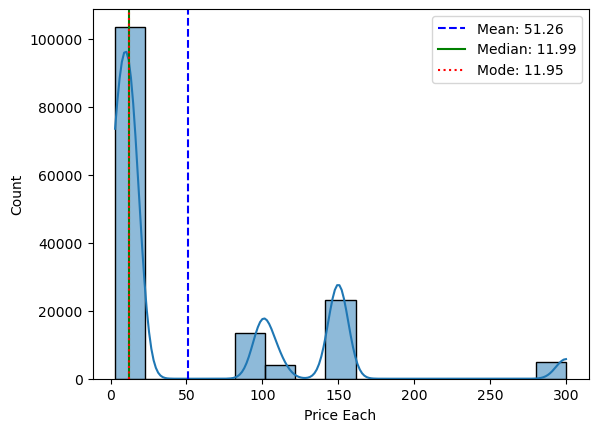

In [141]:
# Distribution of Product Price after removing Outliers.
# Create the histogram
ax = sns.histplot(ecom4, x='Price Each', bins=15, kde=True)

# Calculate statistics
mean = ecom4['Price Each'].mean()
median = ecom4['Price Each'].median()
mode = ecom4['Price Each'].mode()[0]  # mode() returns a Series

# Add vertical lines
plt.axvline(mean, color='blue', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')
plt.axvline(mode, color='red', linestyle=':', label=f'Mode: {mode:.2f}')

# Add legend
plt.legend()

plt.show()



In [143]:
# Standard Deviation: (outlier treatment)
print("Standard deviation before=", ecom3['Price Each'].std())
print("Standard deviation after=", ecom4['Price Each'].std())

Standard deviation before= 332.8438383899937
Standard deviation after= 71.1309982733632


# 7.2 Univariate analysis (categorical)

In [146]:
categorical_features.columns

Index(['Order ID', 'Product', 'Purchase Address', 'Day_name', 'Month_name',
       'Street', 'City', 'CPT_code', 'Category'],
      dtype='object')

# 7.2.1. Barplot

<Axes: ylabel='Product'>

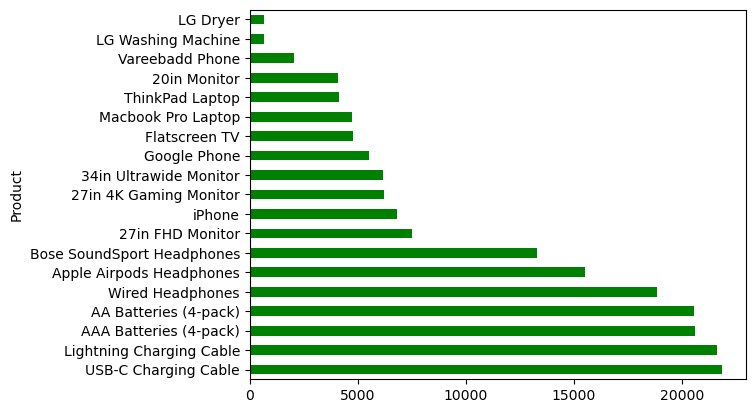

In [149]:
ecom3['Product'].value_counts().plot.barh(color = 'green')

In [151]:
# Count of Product.
ecom3['Product'].value_counts()

Product
USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: count, dtype: int64

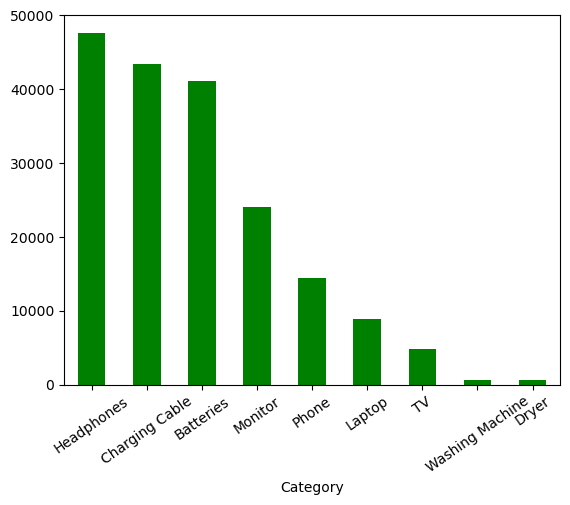

In [155]:
# Category wise Plot for count of Product category.
ecom3['Category'].value_counts().plot.bar(color = 'green')
plt.xticks(rotation = 35)
plt.show()

In [85]:
# product Category Count.
ecom3['Category'].value_counts()

Category
Headphones         47672
Charging Cable     43469
Batteries          41170
Monitor            23995
Phone              14427
Laptop              8847
TV                  4794
Washing Machine      666
Dryer                646
Name: count, dtype: int64

<Axes: ylabel='Month_name'>

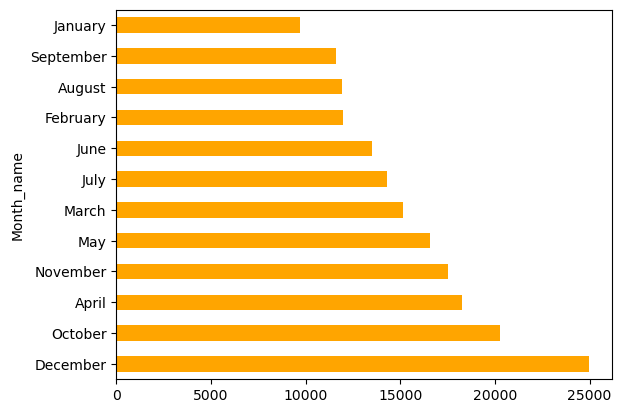

In [86]:
# Month wise Product count.
ecom3['Month_name'].value_counts().plot.barh(color = 'orange')

In [157]:
# month wise Product count.
ecom3['Month_name'].value_counts()

Month_name
December     24944
October      20249
April        18257
November     17544
May          16552
March        15128
July         14275
June         13535
February     11957
August       11943
September    11603
January       9699
Name: count, dtype: int64

# 7.2.2. Pie chart 

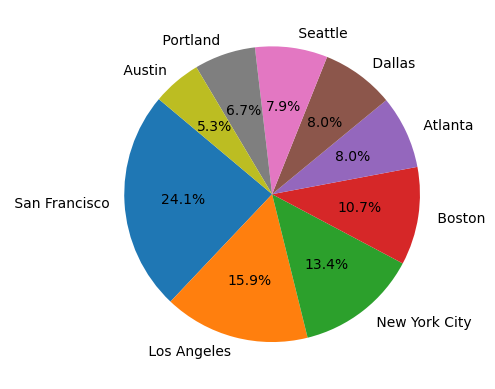

In [160]:
# City wise Product count Percentage.
city_wise_count = ecom3['City'].value_counts()
city_names = ecom3['City'].value_counts().index

# draw the chart:
plt.pie(city_wise_count, labels=city_names, autopct='%1.1f%%', startangle=140 )
plt.show()

In [162]:
# city wise Orders:
ecom3['City'].value_counts()

City
San Francisco    44662
Los Angeles      29564
New York City    24847
Boston           19901
Atlanta          14863
Dallas           14797
Seattle          14713
Portland         12449
Austin            9890
Name: count, dtype: int64

# 8. Bivariate analysis (categorical vs numerical)

In [164]:
categorical_features.columns

Index(['Order ID', 'Product', 'Purchase Address', 'Day_name', 'Month_name',
       'Street', 'City', 'CPT_code', 'Category'],
      dtype='object')

In [166]:
numerical_features.columns

Index(['Quantity Ordered', 'Price Each', 'Day', 'Month', 'Total Price'], dtype='object')

# 8.1. Bar plot

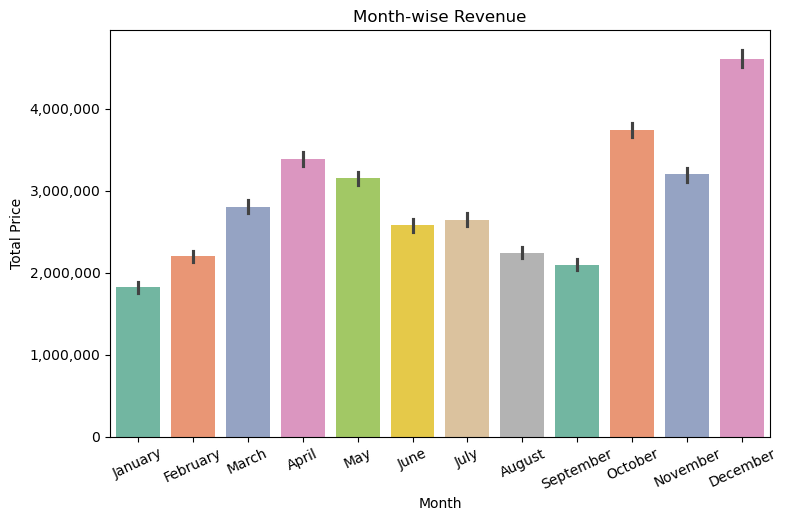

In [169]:
# manth wise revenue:
import matplotlib.ticker as ticker
plt.figure(figsize=(8, 5))
ax = sns.barplot( x = 'Month_name' , y= 'Total Price' , data =ecom3  , palette='Set2' , estimator=sum )

# Format y-axis to show full number
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title("Month-wise Revenue")
plt.ylabel("Total Price")
plt.xlabel("Month")
plt.tight_layout()
plt.xticks(rotation=25)

plt.show()

In [171]:
ecom3.groupby(['Month_name'])['Total Price'].sum()

Month_name
April        3389217.98
August       2241083.37
December     4608295.70
February     2200078.08
January      1821413.16
July         2646461.32
June         2576280.15
March        2804973.35
May          3150616.23
November     3197875.05
October      3734777.86
September    2094465.69
Name: Total Price, dtype: float64

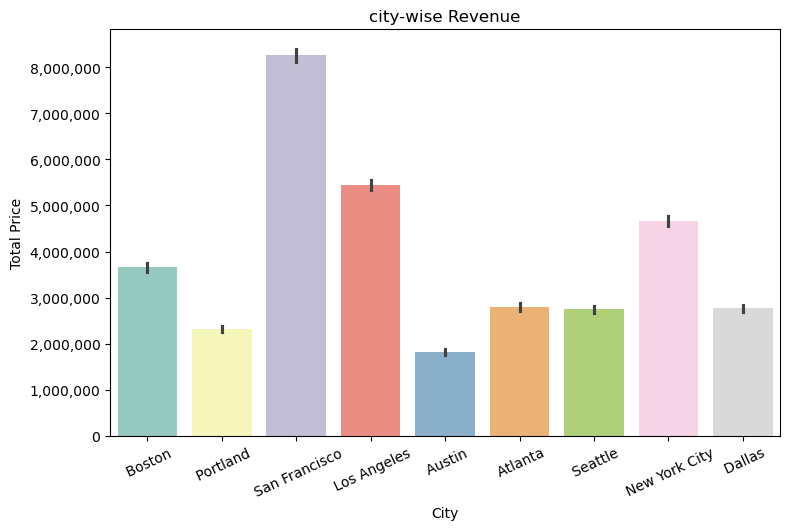

In [175]:
# city wise revenue:
plt.figure(figsize=(8, 5))
ax = sns.barplot( x = 'City' , y= 'Total Price' , data =ecom3  , palette='Set3' , estimator=sum )

# Format y-axis to show full number
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title("city-wise Revenue")
plt.ylabel("Total Price")
plt.xlabel("City")
plt.tight_layout()
plt.xticks(rotation=25)

plt.show()

In [177]:
# Total number of product Orders
ecom3.groupby(['Product'])['Quantity Ordered'].sum()

Product
20in Monitor                   4126
27in 4K Gaming Monitor         6239
27in FHD Monitor               7541
34in Ultrawide Monitor         6192
AA Batteries (4-pack)         27615
AAA Batteries (4-pack)        30986
Apple Airpods Headphones      15637
Bose SoundSport Headphones    13430
Flatscreen TV                  4813
Google Phone                   5529
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23169
Macbook Pro Laptop             4725
ThinkPad Laptop                4128
USB-C Charging Cable          23931
Vareebadd Phone                2068
Wired Headphones              20524
iPhone                         6847
Name: Quantity Ordered, dtype: int32

In [179]:
# category wise no. of orders:
ecom3['Category'].value_counts()

Category
Headphones         47672
Charging Cable     43469
Batteries          41170
Monitor            23995
Phone              14427
Laptop              8847
TV                  4794
Washing Machine      666
Dryer                646
Name: count, dtype: int64

In [181]:
# city wise no. of orders:
ecom3['Category'].value_counts()

Category
Headphones         47672
Charging Cable     43469
Batteries          41170
Monitor            23995
Phone              14427
Laptop              8847
TV                  4794
Washing Machine      666
Dryer                646
Name: count, dtype: int64

In [183]:
ecom3.groupby(['City'])['Total Price'].sum()

City
Atlanta          2794199.07
Austin           1818044.33
Boston           3658627.65
Dallas           2765373.96
Los Angeles      5448304.28
New York City    4661867.14
Portland         2319331.94
San Francisco    8254743.55
Seattle          2745046.02
Name: Total Price, dtype: float64

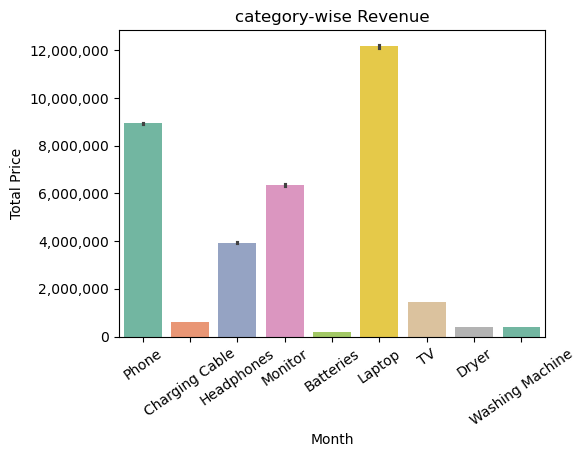

In [185]:
# Category wise revenue:
import matplotlib.ticker as ticker
plt.figure(figsize=(6, 4))
ax = sns.barplot( x = 'Category' , y= 'Total Price' , data =ecom3  , palette='Set2' , estimator=sum )

# Format y-axis to show full number
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.title("category-wise Revenue")
plt.ylabel("Total Price")
plt.xlabel("Month")
plt.tight_layout()
plt.xticks(rotation=35)

plt.show()

In [ ]:
# Category Wise Revenue.
ecom3.groupby(['Category'])['Total Price'].sum()

In [187]:
# Category wise Revenue Stats.
ecom3.groupby(['Category'])['Total Price'].agg(['sum' , 'median','mean' , 'std' , 'min' , 'max'])

,sum,median,mean,std,min,max
Category,,,,,,
Batteries,198689.74,3.84,4.826081,2.620210,2.99,26.91
Charging Cable,632352.00,14.95,14.547195,4.284343,11.95,71.70
Dryer,387600.00,600.00,600.000000,0.000000,600.00,600.00
Headphones,3934498.46,99.99,82.532691,60.176281,11.99,450.00
Laptop,12160458.72,1700.00,1374.529074,351.892158,999.99,3400.00
Monitor,6370939.02,379.99,265.511107,126.352025,109.99,779.98
Phone,8937500.00,600.00,619.498163,102.797811,400.00,1400.00
TV,1443900.00,300.00,301.188986,18.850897,300.00,600.00
Washing Machine,399600.00,600.00,600.000000,0.000000,600.00,600.00


In [189]:
# City wise revenue stats.
ecom3.groupby(['City'])['Total Price'].agg(['sum' ,'median', 'mean' , 'std' , 'min' , 'max'])

,sum,median,mean,std,min,max
City,,,,,,
Atlanta,2794199.07,14.95,187.996977,334.876275,2.99,1700.0
Austin,1818044.33,14.95,183.826525,331.628368,2.99,1700.0
Boston,3658627.65,14.95,183.841397,329.352885,2.99,3400.0
Dallas,2765373.96,14.95,186.887474,334.446402,2.99,1700.0
Los Angeles,5448304.28,14.95,184.288468,332.243107,2.99,1700.0
New York City,4661867.14,14.95,187.622938,336.359270,2.99,3400.0
Portland,2319331.94,14.95,186.306686,337.153437,2.99,1700.0
San Francisco,8254743.55,14.95,184.827002,332.675745,2.99,3400.0
Seattle,2745046.02,14.95,186.572828,329.165595,2.99,1700.0


In [186]:
# Month wise Revenue stats.
ecom3.groupby(['Month_name'])['Total Price'].agg(['sum' ,'median' ,'mean' , 'std' , 'min' , 'max'])

,sum,median,mean,std,min,max
Month_name,,,,,,
April,3389217.98,14.95,185.639370,332.141314,2.99,3400.00
August,2241083.37,14.95,187.648277,332.193945,2.99,1700.00
December,4608295.70,14.95,184.745658,332.820367,2.99,1700.00
February,2200078.08,14.95,183.999170,325.988793,2.99,1700.00
January,1821413.16,14.95,187.793913,331.092526,2.99,1999.98
July,2646461.32,14.95,185.391336,333.024103,2.99,1700.00
June,2576280.15,14.95,190.342087,337.582608,2.99,3400.00
March,2804973.35,14.95,185.416007,331.556813,2.99,1700.00
May,3150616.23,14.95,190.346558,342.964978,2.99,3400.00


In [191]:
# Product Price stats.
ecom3.groupby(['Price Each'])['Quantity Ordered'].agg(['sum', 'count'  , 'max']).reset_index()

,Price Each,sum,count,max
0,2.99,30986,20612,9
1,3.84,27615,20558,7
2,11.95,23931,21859,6
3,11.99,20524,18849,4
4,14.95,23169,21610,4
5,99.99,13430,13298,3
6,109.99,4126,4098,2
7,149.99,7541,7498,2
8,150.00,15637,15525,3
9,300.00,4813,4794,2


In [193]:
# Product Price bin-wise orders count:
ecom3['Price Each'].value_counts().reset_index().sort_values(by = 'Price Each' , ascending = True)

,Price Each,count
2,2.99,20612
3,3.84,20558
0,11.95,21859
4,11.99,18849
1,14.95,21610
6,99.99,13298
15,109.99,4098
7,149.99,7498
5,150.00,15525
12,300.00,4794


In [ ]:
# monthy total price vs quantity ordered
# trends line monthly (running sum)
# category wise total revenue vs quantity ordered


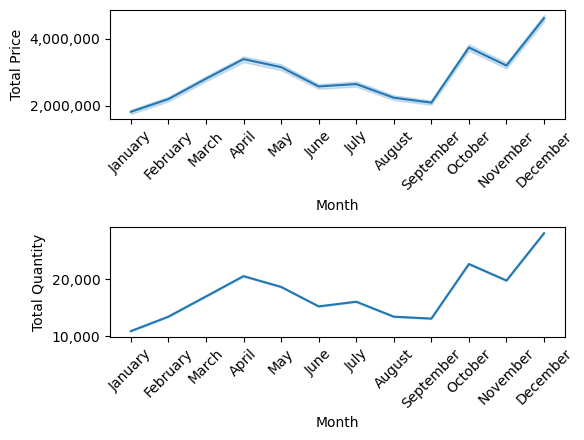

In [195]:
# manth wise revenue vs total order quantity:
import matplotlib.ticker as ticker
plt.figure(figsize=(6,4))
plt.subplot(2,1,1)
ax1 = sns.lineplot( x = 'Month_name' , y= 'Total Price'  , data =ecom3  , palette='Set2' , estimator=sum )
# Format y-axis to show full number
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.ylabel("Total Price")
plt.xlabel("Month")
plt.tight_layout()
plt.xticks(rotation=45)

plt.subplot(2,1,2)
ax2 = sns.lineplot( x = 'Month_name' , y= 'Quantity Ordered'  , data =ecom3  , palette='Set2' , estimator=sum )
# Format y-axis to show full number
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))


plt.ylabel("Total Quantity")
plt.xlabel("Month")
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

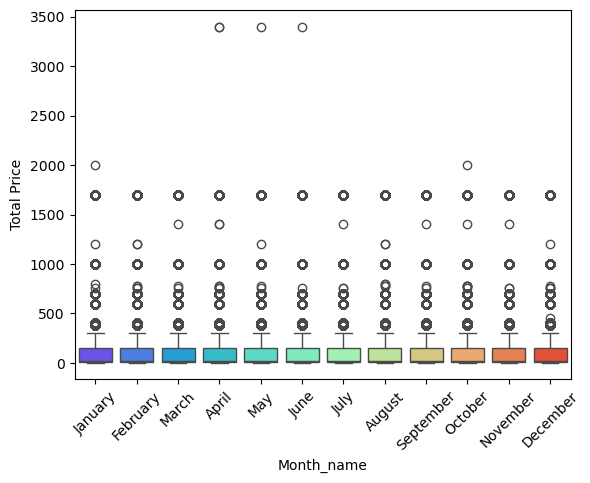

In [197]:
# monthly order price outliers.
sns.boxplot(x = 'Month_name' , y = 'Total Price' , data = ecom3 ,palette = 'rainbow' )
plt.xticks(rotation = 45)
plt.show()

In [199]:
# Order Price cumulative Sum.
ecom3['price_cumsum'] = ecom3['Total Price'].cumsum()

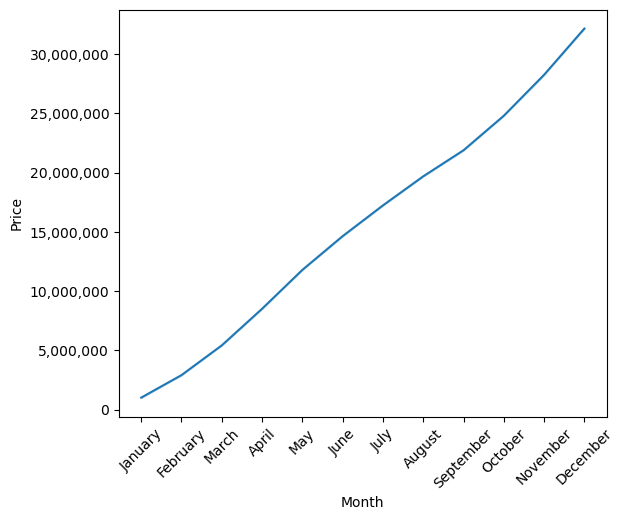

In [201]:
ax2 = sns.lineplot( x = 'Month_name' , y= 'price_cumsum'  , data =ecom3  , palette='Set2'  )
# Format y-axis to show full number
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))


plt.ylabel("Price")
plt.xlabel("Month")
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

In [145]:
# Product category categorical data.
pd.Categorical(ecom3['Category'])

['Phone', 'Charging Cable', 'Headphones', 'Monitor', 'Headphones', ..., 'Charging Cable', 'Batteries', 'Phone', 'Headphones', 'Headphones']
Length: 185686
Categories (9, object): ['Batteries', 'Charging Cable', 'Dryer', 'Headphones', ..., 'Monitor', 'Phone', 'TV', 'Washing Machine']